Shape of X:  (2, 384, 384, 3)
Shape of y:  (2, 6)


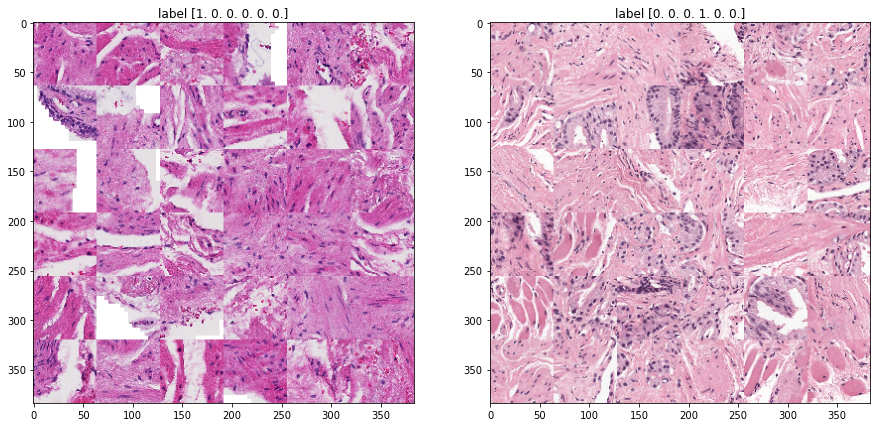

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import training_configs
import pandas as pd

import pandaGenerator


config=training_configs.seresnext50_config
# config=training_configs.seresnext50_config
#config=training_configs.densenet121_config
#config=training_configs.vgg16_config
df = pd.read_csv(config.train_csv)
df = df.sample(frac=1, random_state=config.seed).reset_index(drop=True)

train_datagen = pandaGenerator.PANDAGenerator(
    df=df, 
    config=config,
    mode='fit', 
    apply_tfms=False,
    shuffle=True, 
)

Xt, yt = train_datagen.__getitem__(20)

print('Shape of X: ', Xt.shape)
print('Shape of y: ', yt.shape)

fig, ax = plt.subplots(figsize=(15, 15), ncols=2)

for i in range(2):
    ax[i].imshow(Xt[i])
    ax[i].set_title('label {}'.format(yt[i, ]))
plt.show()



In [4]:
import matplotlib.pyplot as plt
import cv2
from numpy import random
import gradcam
def plot_gradcam(model,config,title):
    fig, ax = plt.subplots(figsize=(15, 10), ncols=5, nrows=2)


    for i in range(5):
        raw_image, y = train_datagen.__getitem__(random.randint(1000))
        image = np.expand_dims(raw_image[0], axis=0)
        #heatmap,prediction = gradcam.make_gradcam_heatmap_orig(image, model, config.last_conv_layer_name, config.classifier_layer_names)
        heatmap,prediction = gradcam.make_gradcam_heatmap_orig(image, model, config.last_conv_layer_name)
        superimposed_image = gradcam.create_superimposed_visualization(raw_image[0], heatmap,cv2.COLORMAP_BONE,np.argmax( y[0]),prediction,0.6)
        ax[0][i].imshow(raw_image[0])
        ax[0][i].set_title('Original - label {}'.format(np.argmax( y[0])))
        ax[1][i].imshow(superimposed_image)
        ax[1][i].set_title('GradCAM - label {}'.format(prediction))

    fig.suptitle(title)
    plt.show()

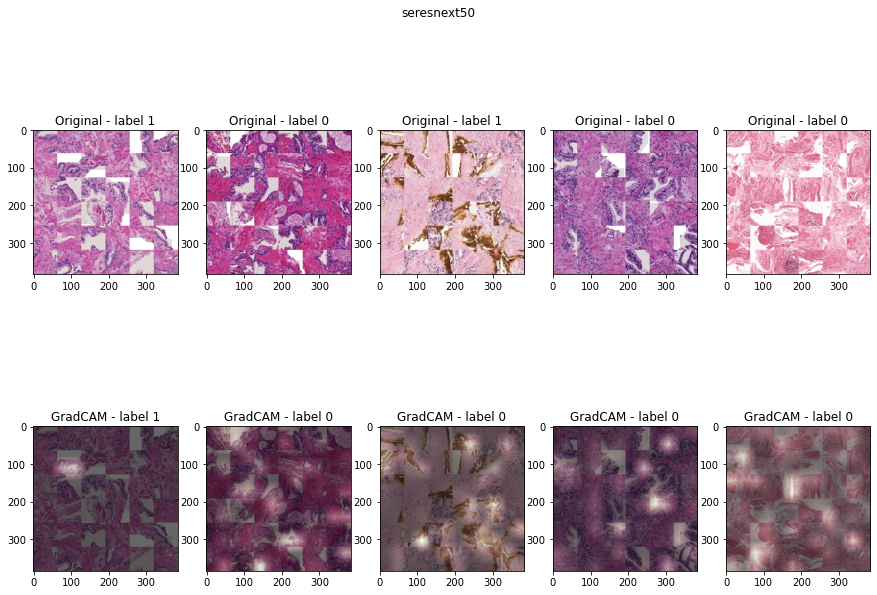

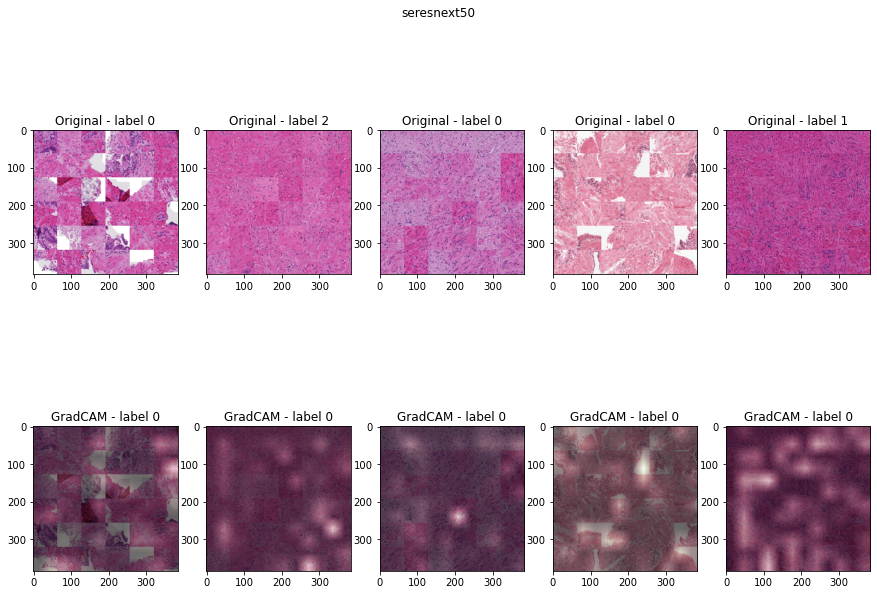

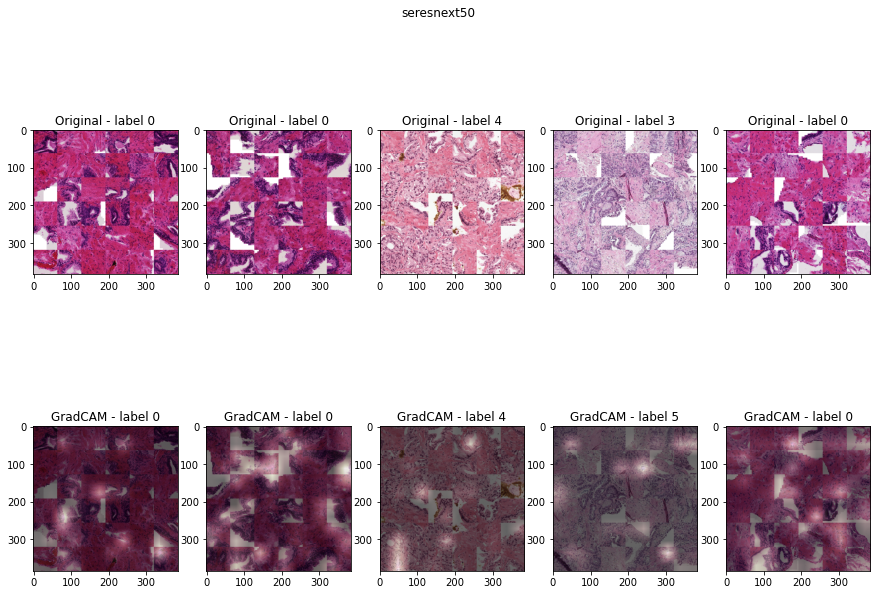

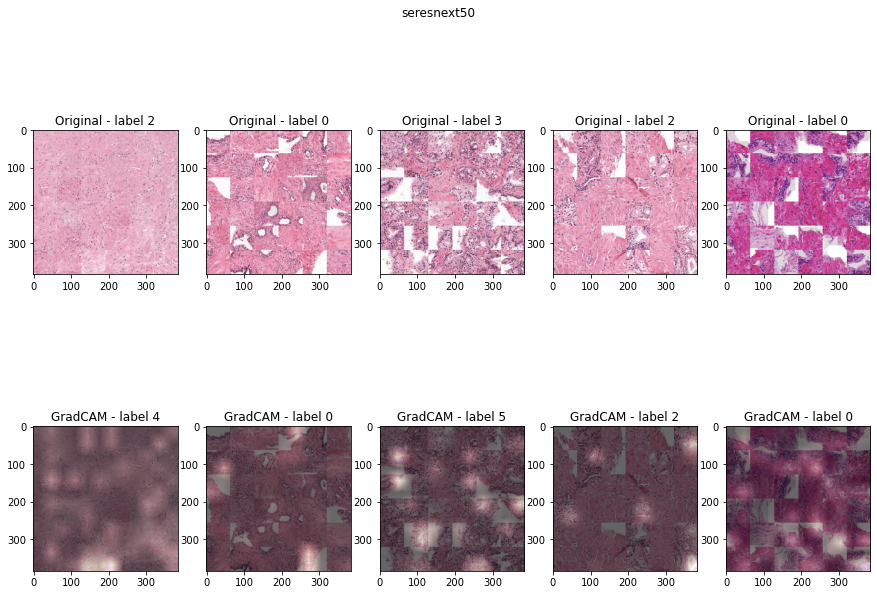

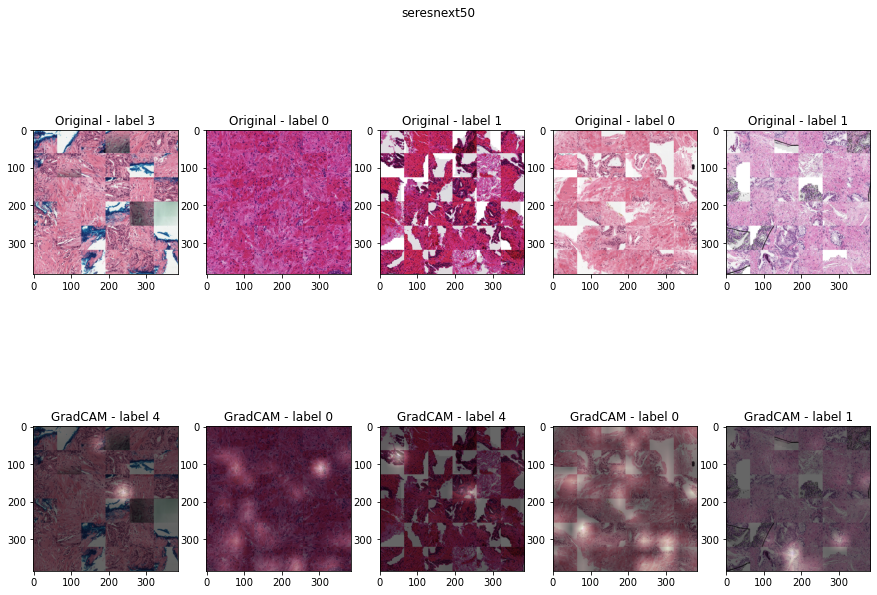

In [5]:
import tensorflow as tf
import tensorflow_addons
config=training_configs.seresnext50_config
model=tf.keras.models.load_model("modelcheckpoints/{}/{}_full.h5".format(config.train_data_name,config.model_name))
for i in range(5):
    plot_gradcam(model,config,config.model_name)

In [ ]:
config=training_configs.vgg16_config
model=tf.keras.models.load_model("modelcheckpoints/{}/{}.h5".format(config.train_data_name,config.model_name))
plot_gradcam(model,config,config.model_name)

In [ ]:
config=training_configs.densenet121_config
model=tf.keras.models.load_model("modelcheckpoints/{}/{}.h5".format(config.train_data_name,config.model_name))
plot_gradcam(model,config,config.model_name)

In [ ]:
config=training_configs.efficientNetB2_config
model=tf.keras.models.load_model("modelcheckpoints/{}/{}.h5".format(config.train_data_name,config.model_name))
plot_gradcam(model,config,config.model_name)